In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

# Batch Gradient Descent Function 

## $$\hat\theta_j := \theta - n \frac{\delta}{\delta\theta_j}J(\theta)$$

In [2]:
def batch_gradient_descent(X, Y, eta, epochs, percent):
    '''Esta funcion se utiliza para implimentar el método de regresión lineal Batch Gradiente Descent
    batch_gradient_descent(X, Y, eta, epocs) where:
    X: DataFrame de instancias o features
    Y: DataFrame de targets
    eta: tasa de aprendizaje (learning rate)
    epocs: numero máximo de iteraciones
    percent: % de datos que seran utilizados para el test (base 100)
    
    ------------------------------------
    Return:
    In order: theta, test_index, train_index, Y_predict, J_log
    
    theta: valores correspondientes a theta_n
    test_index: data test index
    train_index: data training index
    Y_predict: Y predict values
    J_log: errores por numero de epoca
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    test_index = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    train_index = list(np.arange(0, m))
    
    for element in test_index:
        train_index.remove(element)
        
    
    X_train = np.c_[X.iloc[train_index]]
    X_test = np.c_[X.iloc[test_index]]
    Y_train = np.c_[Y.iloc[train_index]]
    Y_test = np.c_[Y.iloc[test_index]]
    
    # Entrenamiento
    
    theta = np.random.randn((X.shape[1] + 1), 1)
    
    J_log = np.zeros(epochs)
    
    m = len(X_train)
    
    X_b = np.c_[np.ones((m, 1)), X_train]

    for i in range(epochs):
        J_log[i] = (2 / m) * ((X_b@theta - Y_train)**2).sum()
        gradients = (1 / m) * (X_b.T @ (X_b @ theta - Y_train)) 
        theta = theta - eta * gradients
    
    # Test
    
    m = len(X_test)
    
    X_b_test = np.c_[np.ones((m, 1)), X_test]
    Y_predict = X_b_test @ theta
    
    return theta, test_index, train_index, Y_predict, J_log

In [3]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 3 + 4*X + 1.5*np.random.randn(m, 1)
percent = 25

In [10]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y)
eta = 0.005
epochs = 1000
sample = 20
Y

,0
0,3.332069
1,11.638004
2,8.916230
3,7.159782
4,9.947800
...,...
95,8.025441
96,7.731109
97,3.499010
98,7.496836


In [5]:
theta, test_index, train_index, Y_predict, J_log = batch_gradient_descent(X, Y, eta, epochs, sample)

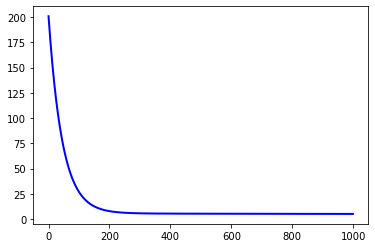

In [6]:
plt.plot(np.arange(epochs), J_log, 'b-', linewidth=2)

plt.show()

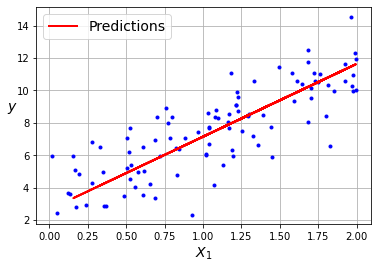

In [7]:
plt.plot(np.c_[X], np.c_[Y], "b.")
plt.plot(np.c_[X.iloc[test_index]], Y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

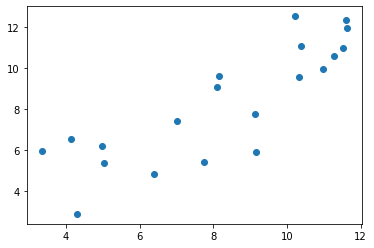

In [8]:
plt.scatter(Y_predict, Y.iloc[test_index])
plt.show()